# Lending Case Study Analysis

In [1]:
###     1. Data Understanding
###     2. Data Cleaning
###     3. Data Analysis
###     4. Conculsion

### Data Understanding

### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

### Importing the Loan Data using UTF-8

In [3]:
src = pd.read_csv('C:\\Users\\sagar.jayaprakash\\Desktop\\Python\\Lending Case Study\\loan\\loan.csv',encoding='utf-8',engine='python')
src.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
src.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

### Null Values

In [5]:
src.isnull().sum().sort_values(ascending = False)

total_il_high_credit_limit    39717
mo_sin_old_rev_tl_op          39717
bc_util                       39717
bc_open_to_buy                39717
avg_cur_bal                   39717
                              ...  
pub_rec                           0
open_acc                          0
inq_last_6mths                    0
earliest_cr_line                  0
id                                0
Length: 111, dtype: int64

In [6]:
# Calculating column's missing percentage 
(round(100 * (src.isnull().sum() / src.shape[0]),2)).sort_values(ascending = False)

total_il_high_credit_limit    100.0
mo_sin_old_rev_tl_op          100.0
bc_util                       100.0
bc_open_to_buy                100.0
avg_cur_bal                   100.0
                              ...  
pub_rec                         0.0
open_acc                        0.0
inq_last_6mths                  0.0
earliest_cr_line                0.0
id                              0.0
Length: 111, dtype: float64

Null Values in most of the columns are equal to the number of rows. Hence getting rid of those unnecessary columns

# DATA CLEANING

1. Dropping those columns which have complete null values.
2. In terms column, it has months concatinated with the numeric so I'm getting rid of that.
3. Unnecessary whitespaces have been cleaned.
4. Emp_Length and Emp_Title have been assumed.

In [7]:
src['emp_length'].replace(to_replace = r'\D*',value = '',regex=True,inplace = True)
try:
    src['emp_length'] = [ int(src['emp_length'][x]) for x in range(0,len(src))]
except ValueError:
    print('')
    
numeric_columns =  ['emp_length']
src[numeric_columns] = src[numeric_columns].apply(pd.to_numeric)
# There are some values in the employee title as na, we assume that they are self employed applicants
src.loc[src['emp_title'].isnull(),'emp_title']  = 'Self Employed' 

# There are some values in the employee length as na, we assume that they are self employed 
#and years can be considered zero
src.loc[src['emp_length'].isnull(),'emp_length'] = int(0)

In [8]:
src.dropna(axis=1, how='all', inplace = True)
src['term'].replace(to_replace = r'months',value = '',regex=True,inplace = True)
src['term'] = [ int(src['term'][x].strip()) for x in range(0,len(src))]
src = src.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [9]:
#after removing columns
src.shape

(39717, 57)

In [10]:
# Removing columns which are not having real predictive power
src.drop(['desc','url','zip_code'], axis = 1,inplace = True)

# Removing the post loan attributes, these are basically generated post loan
src.drop(['total_rec_late_fee', 'recoveries','collection_recovery_fee','last_pymnt_d', 
          'last_pymnt_amnt', 'last_credit_pull_d','revol_bal','revol_util'], axis = 1,inplace = True)

# Calculating missing percentage
missing_col_per = (round(100 * (src.isnull().sum() /  src.shape[0]),2))
missing_col_per[missing_col_per.values > 0].sort_values()

title                          0.03
tax_liens                      0.10
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
mths_since_last_delinq        64.66
mths_since_last_record        92.99
next_pymnt_d                  97.13
dtype: float64

In [11]:
# Calculating row's missing percentage 
round(100 * (src.isnull().sum(axis=1) / src.shape[1]),2).sort_values(ascending = False)

39659    15.22
39650    15.22
39688    15.22
39660    15.22
39686    15.22
         ...  
8451      0.00
6873      0.00
11439     0.00
13631     0.00
12717     0.00
Length: 39717, dtype: float64

Null values in most of rows are reasonably fine. So not dropping any rows.

In [12]:
# Remove percentange in intrest rate column
src.int_rate = src['int_rate'].astype(str).str.replace('%','')

# Cast columns to numeric to find the correlation and to plot any graphs. 
numeric_columns =  ['int_rate']
src[numeric_columns] = src[numeric_columns].apply(pd.to_numeric)
src.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 46 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null int64
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     39717 non-null object
emp_length                    39717 non-null float64
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_p

## Since the issue_d column is of type object
## We are splitting the issue_d column to issue_d_month and issue_d_year

In [13]:
src_month_year = src['issue_d'].str.partition("-", True)
src['issue_d_month'] = src_month_year[0]
src['issue_d_year'] = '20' + src_month_year[2]

In [14]:
src = src[src['loan_status'] != 'Current']

In [15]:
src.loc[src['loan_status'] == 'Charged Off','loan_status'] = 1
src.loc[src['loan_status'] == 'Fully Paid','loan_status'] = 0

In [16]:
src.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_d_month,issue_d_year
0,1077501,1296599,5000,5000,4975.00000,36,10.65,162.87,B,B2,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,2011
1,1077430,1314167,2500,2500,2500.00000,60,15.27,59.83,C,C4,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,2011
2,1077175,1313524,2400,2400,2400.00000,36,15.96,84.33,C,C5,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,2011
3,1076863,1277178,10000,10000,10000.00000,36,13.49,339.31,C,C1,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,2011
5,1075269,1311441,5000,5000,5000.00000,36,7.90,156.46,A,A4,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,2011
6,1069639,1304742,7000,7000,7000.00000,60,15.96,170.08,C,C5,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,2011
7,1072053,1288686,3000,3000,3000.00000,36,18.64,109.43,E,E1,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,2011
8,1071795,1306957,5600,5600,5600.00000,60,21.28,152.39,F,F2,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,2011
9,1071570,1306721,5375,5375,5350.00000,60,12.69,121.45,B,B5,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,2011
10,1070078,1305201,6500,6500,6500.00000,60,14.65,153.45,C,C3,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,2011


In [17]:
src.describe(percentiles=[.25,.50,.90,.95,.99,.999])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,...,38577.000000,38577.000000,38577.000000,38521.0,38577.0,38577.0,38521.0,38577.0,37880.000000,38538.0
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,41.898437,11.932219,322.466318,4.925526,6.877797e+04,...,11271.196153,9648.322898,2119.243370,0.0,1.0,0.0,0.0,0.0,0.043479,0.0
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,10.333136,3.691327,208.639215,3.453921,6.421868e+04,...,8700.845592,7009.381200,2389.499511,0.0,0.0,0.0,0.0,0.0,0.204583,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,0.000000,4.000000e+03,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,36.000000,8.940000,165.740000,2.000000,4.000000e+04,...,5019.590000,4500.000000,643.990000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.440000,36.000000,11.710000,277.860000,4.000000,5.886800e+04,...,9066.660000,8000.000000,1300.450000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
90%,1.002881e+06,1.228617e+06,21600.000000,20000.000000,19975.000000,60.000000,16.820000,620.900000,10.000000,1.150000e+05,...,23375.242000,20000.000000,4889.208000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
95%,1.038337e+06,1.268022e+06,25000.000000,25000.000000,24500.066590,60.000000,18.312000,760.820000,10.000000,1.400040e+05,...,28989.590000,24280.000000,6862.398000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
99%,1.063035e+06,1.295064e+06,35000.000000,35000.000000,34715.012285,60.000000,20.990000,931.090000,10.000000,2.341440e+05,...,40415.309200,34000.000000,11888.919600,0.0,1.0,0.0,0.0,0.0,1.000000,0.0
99.9%,1.069246e+06,1.303707e+06,35000.000000,35000.000000,35000.000000,60.000000,23.130000,1230.330000,10.000000,7.000000e+05,...,51177.360000,35000.000000,18400.267920,0.0,1.0,0.0,0.0,0.0,1.000000,0.0


### Plotting the Graph to understand the outliers

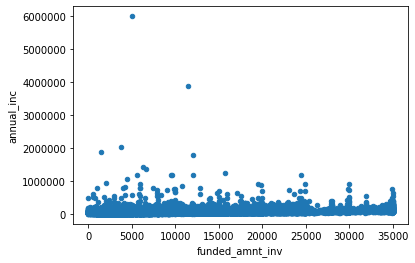

In [18]:
src.plot(kind='scatter',x='funded_amnt_inv',y='annual_inc')
plot.show(block=True);

### Quantifing based on the standard value

In [19]:
quant_df = src.iloc[:].quantile([.95])

In [20]:
src = src[(src['annual_inc'] <= quant_df['annual_inc'][:][0.95])]

### After removing the outliers

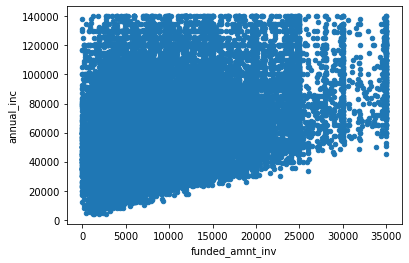

In [21]:
src.plot(kind='scatter',x='funded_amnt_inv',y='annual_inc')
plot.show(block=True);

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# UserDefined Functions
def uni_continuos_plot(df,column):
    fig, ax = plt.subplots(figsize=(10,5))
    fig.suptitle("Spread and central Tendency of " + column)
    sns.violinplot(data =src, x=column, inner="quartile")
    plt.show()

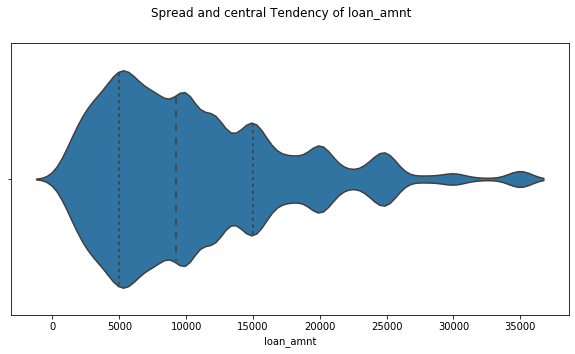

In [23]:
uni_continuos_plot(src,'loan_amnt')

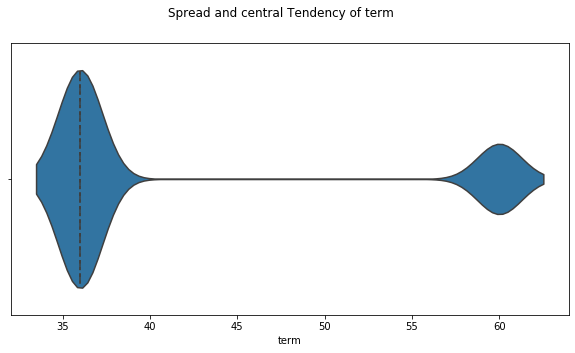

In [24]:
uni_continuos_plot(src,'term')

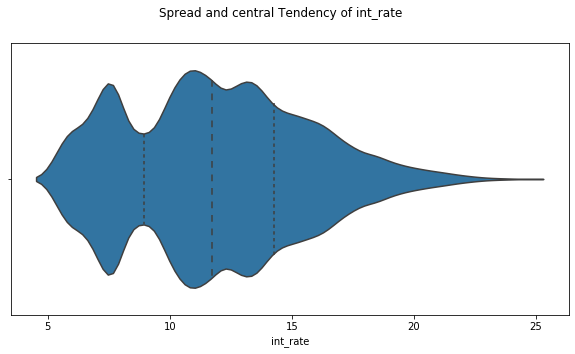

In [25]:
uni_continuos_plot(src,'int_rate')

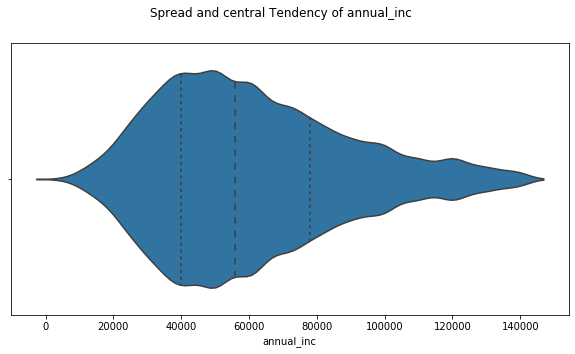

In [26]:
uni_continuos_plot(src,'annual_inc')

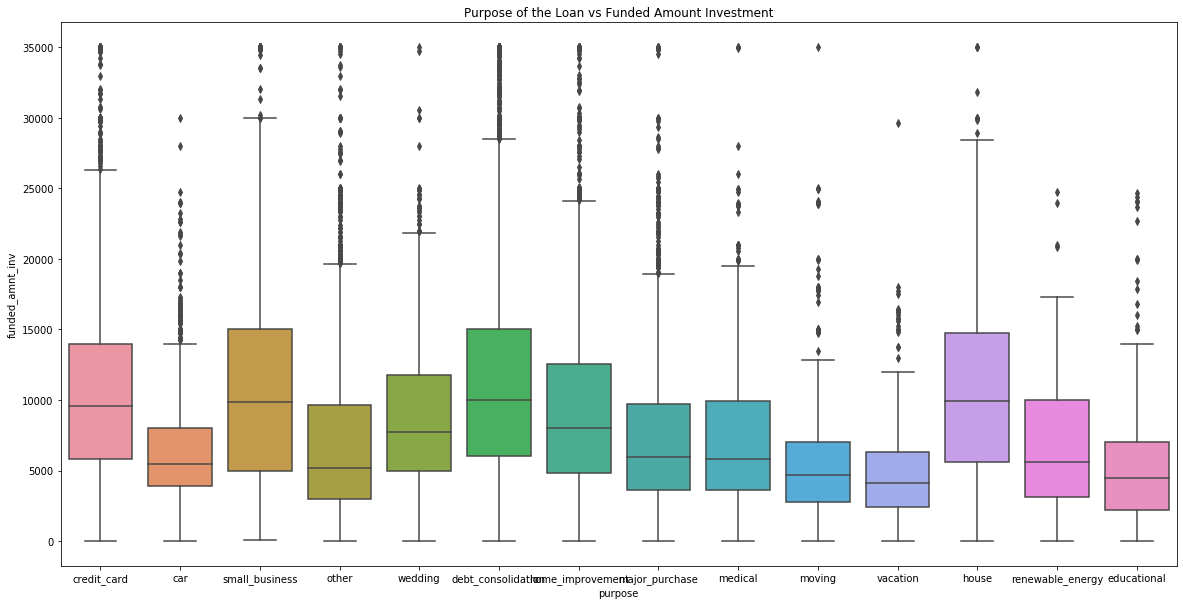

In [27]:
#BOX PLOT for purpose and loan amount
plt.figure(figsize=(20, 10))
sns.boxplot(x='purpose', 
            y='funded_amnt_inv', data=src)
plt.title('Purpose of the Loan vs Funded Amount Investment',loc = 'center')
plt.yscale('linear')
plt.show()
##Inference- by seeing the box plot we can say that purpose small business has wide spread of loan amount 
#and max of loan is for small business.

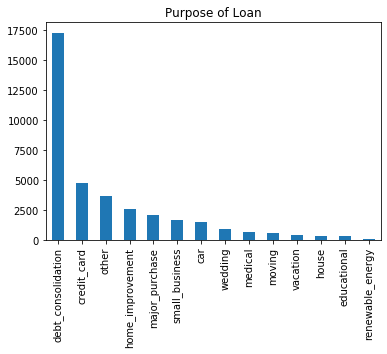

In [29]:
#the bar plot for count of purpose of loan
src['purpose'].value_counts().plot.bar()
plt.title('Purpose of Loan')
#plt.ylable('counts')
plt.show()
##Inference- Purpose of the loan shows as debt_consolidation 

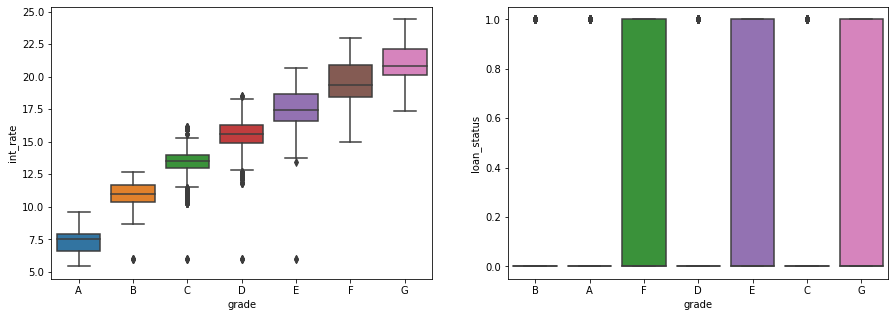

In [30]:
fig, ax = plt.subplots(1,2, figsize=(15,5))


sns.boxplot(x ='grade', y = 'int_rate',data=src.sort_values(by=['grade']),ax = ax[0])
sns.boxplot(x='grade', y='loan_status', data=src.sort_values(by=['loan_status']),ax= ax[1])
plt.show()
##1. Inference- as the grade increases the Interest rate also increases:

##2. Inference- Highest Number of people who have charged off are from 'E','F','G' Graded Rate of Interest. 
##Those with more rate of interest are being charged off

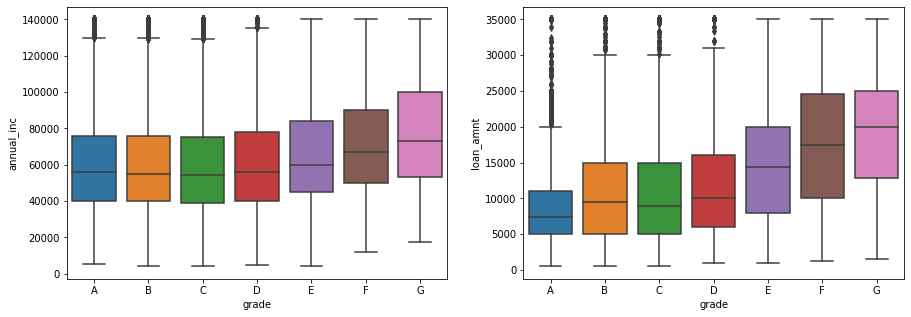

In [32]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(x ='grade', y = 'annual_inc',data=src.sort_values(by=['annual_inc']),ax = ax[0], order = 'ABCDEFG')
sns.boxplot(x='grade', y='loan_amnt', data=src.sort_values(by=['loan_amnt']),ax= ax[1], order = 'ABCDEFG')
plt.show()
##Inference- as the grade increases the Interest rate also increases:

### Dividing the data based on the loan_status for better understanding

In [33]:
def_co = src.loc[src['loan_status'] == 0,:].dropna(axis=1, how='all')
fp = src.loc[src['loan_status'] == 1,:].dropna(axis=1, how='all')

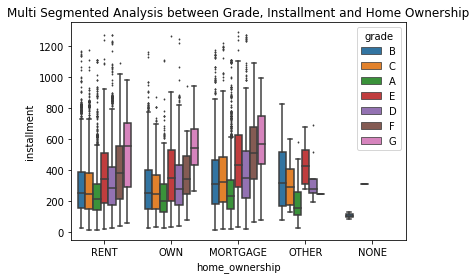

In [34]:
sns.boxplot(x='home_ownership',y='installment',hue='grade',data = def_co,fliersize = 1)
plt.title('Multi Segmented Analysis between Grade, Installment and Home Ownership')
plt.show(block=True);
##Inference- People in charged off region are highest from Mortgage, Rent and Own Home Ownership and they fall in 'E','F','G' grades.

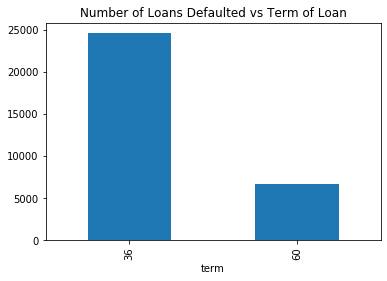

In [35]:
def_co.groupby(['term'])['id'].count().plot(kind='bar',title='Number of Loans Defaulted vs Term of Loan');

Text(0, 0.5, 'Loan_Amount')

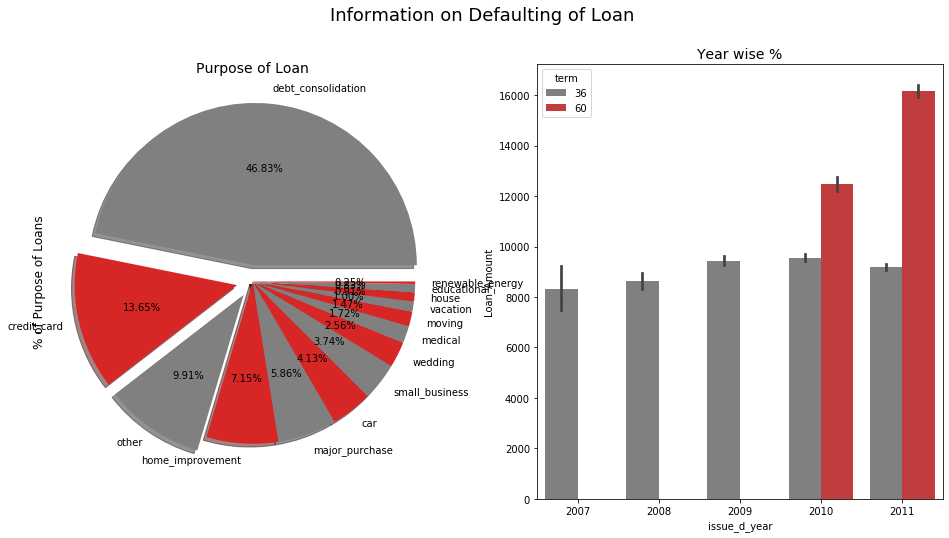

In [36]:
## To calculate the percentage of Good and bad loan
f, ax = plt.subplots(1,2, figsize=(16,8))
colors = ["#808080", "#D72626"]
plt.suptitle('Information on Defaulting of Loan', fontsize=18)

def_co['purpose'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0],
                                          autopct='%1.2f%%', ax=ax[0],
                                              shadow=True,colors=colors)
ax[0].set_title('Purpose of Loan', fontsize=14)
ax[0].set_ylabel('% of Purpose of Loans', fontsize=12)

palette = ["#808080", "#D72626"]
sns.barplot(x='issue_d_year', y="loan_amnt", hue='term', data=def_co,
           palette=palette )
ax[1].set_title('Year wise %', fontsize=14)
ax[1].set_ylabel('Loan_Amount')

##Type Driven - Create new column for Data Analysis/plotting graph

In [37]:
src.loc[src['loan_amnt'] <= 4999, 'loan_amnt_range'] = '< 5K'
src.loc[src['loan_amnt'] > 4999, 'loan_amnt_range'] = '5K-10K'
src.loc[src['loan_amnt'] > 9999, 'loan_amnt_range'] = '10K-15K'
src.loc[src['loan_amnt'] > 14999, 'loan_amnt_range'] = '15K-20K'
src.loc[src['loan_amnt'] > 19999, 'loan_amnt_range'] = '20K-25K'
src.loc[src['loan_amnt'] > 24999, 'loan_amnt_range'] = '25K-30K'
src.loc[src['loan_amnt'] > 29999, 'loan_amnt_range'] = '> 30K'
src.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_d_month,issue_d_year,loan_amnt_range
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,2011,5K-10K
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,2011,< 5K
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,2011,< 5K
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,2011,10K-15K
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,2011,5K-10K


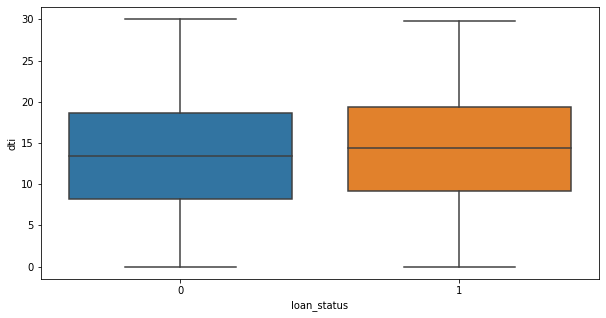

In [38]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="loan_status", y="dti", data=src)
plt.show()
##Inference- Bad loans have more debt to income ratio

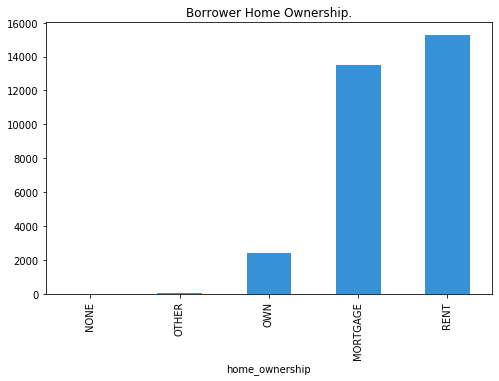

In [39]:
#HomeOwnership vs loan amount count in bar plot
plt.figure(figsize=(8,5))
colors = ["#3791D7"]
df2 = def_co.groupby(['home_ownership'])['loan_amnt'].count().sort_values(ascending=True)
plot= df2.plot(kind='bar', title="Borrower Home Ownership.", color=colors)

<Figure size 576x360 with 0 Axes>

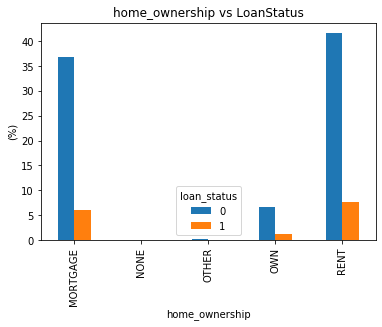

In [40]:
#HomeOwnership vs loan status in percentage 
plt.figure(figsize=(8,5))
group= src.groupby(['home_ownership','loan_status'])
group1= pd.DataFrame(group.loan_status.count())
group1.rename(columns={'loan_status':'Count'},inplace = True)
group1.reset_index(inplace=True)
group1['Count'] = 100 * (group1['Count'] / group1['Count'].sum() )
group1.pivot(index="home_ownership", columns = "loan_status", values = "Count").plot.bar()
plt.ylabel('(%)')
plt.title('home_ownership vs LoanStatus')
plt.show()
##Inference - People who have defaulted are in rented house max.

<Figure size 576x360 with 0 Axes>

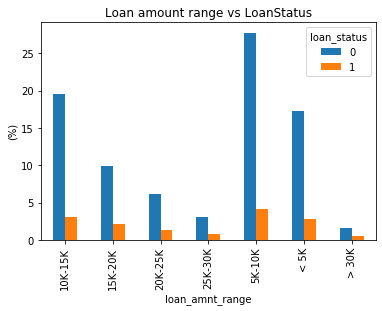

In [41]:
#Loan amount range vs Loan status
plt.figure(figsize=(8,5))
g = src.groupby(['loan_amnt_range','loan_status'])
g1= pd.DataFrame(g.loan_status.count())
g1.rename(columns={'loan_status':'Count'},inplace = True)
g1.reset_index(inplace=True)
g1['Count']= 100 * (g1['Count']/ g1['Count'].sum())
g1.pivot(index="loan_amnt_range", columns = "loan_status", values = "Count").plot.bar()
plt.ylabel('(%)')
plt.title('Loan amount range vs LoanStatus')
plt.show()
##Inference - bad Loans occur most when loan are take b/w 5K to 10K

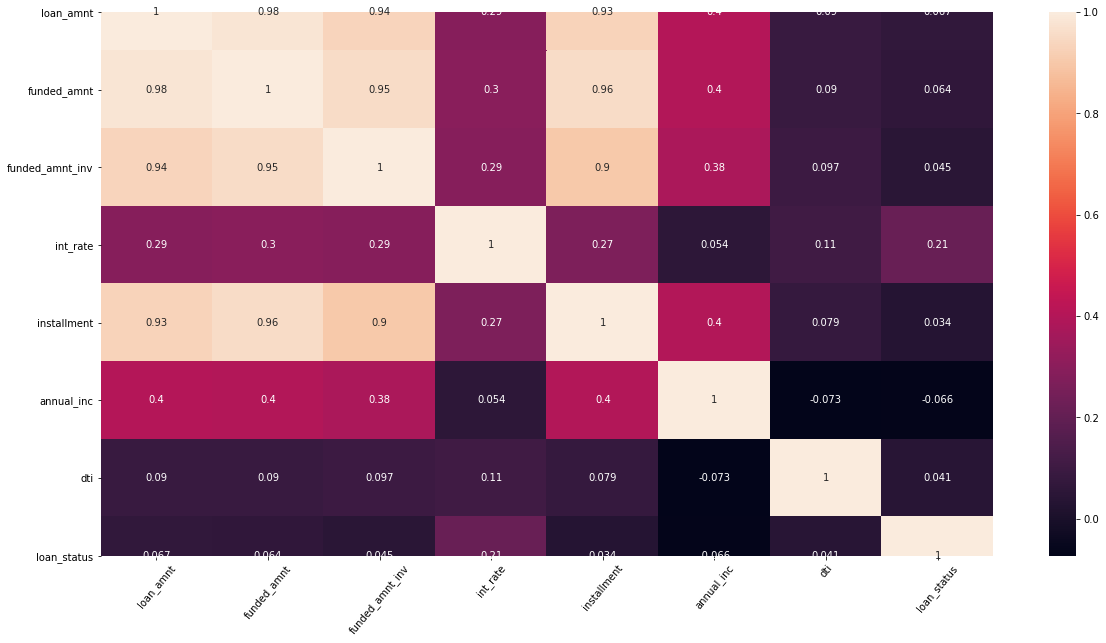

In [42]:
# to generate a heat map for numeric variables.
corColumns = ['loan_amnt','funded_amnt','funded_amnt_inv',
              'int_rate','installment','annual_inc','dti','loan_status']

corrRelation = src[corColumns].corr()

plt.figure(figsize=(20,10))
sns.heatmap(corrRelation,xticklabels = corrRelation.columns.values,yticklabels= corrRelation.columns.values, annot = True)
plt.xticks(rotation=50)
plt.show()

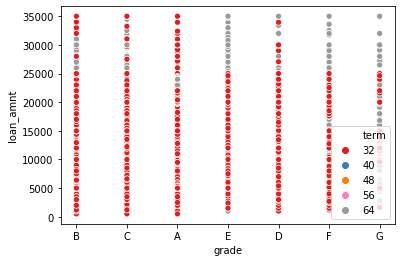

In [43]:
sns.scatterplot(x='grade',y='loan_amnt',hue='term',data=def_co,palette='Set1')
plt.show()
## Inference - Defaulted Customers are majorly with high income and higher term length with higher rate of interest.